In [70]:
from random import seed
from random import random
from math import exp
import numpy as np
import pandas as pd
import textwrap
import timeit
import binascii
import zlib, base64
import json
import io

In [134]:
import json
import io
import matplotlib.pyplot as plt
import time

In [72]:
def addZeros(strr, n): 
    for i in range(n): 
        strr = "0" + strr 
    return strr 

def getXOR(a, b): 
    aLen = len(a) 
    bLen = len(b) 


    if (aLen > bLen): 
        b = addZeros(b, aLen - bLen) 
    elif (bLen > aLen): 
        a = addZeros(a, bLen - aLen) 
 
    lenn = max(aLen, bLen); 

    res = "" 
    for i in range(lenn): 
        if (a[i] == b[i]): 
            res += "0"
        else: 
            res += "1"
    return res 

In [73]:
def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int(binascii.hexlify(text.encode(encoding, errors)), 16))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

def text_from_bits(bits, encoding='utf-8', errors='surrogatepass'):
    n = int(bits, 2)
    return int2bytes(n).decode(encoding, errors)

def int2bytes(i):
    hex_string = '%x' % i
    n = len(hex_string)
    return binascii.unhexlify(hex_string.zfill(n + (n & 1)))

In [74]:
#initializing the network
def initialize_network(parameters):
    network = list()
    for j in range(1,len(parameters)):
        layer = [{'weights':[random() for i in range(parameters[j-1] + 1)]} for i in range(parameters[j])]
        network.append(layer)
    return network

In [85]:
# Calculate neuron activation for an input
def activate(weights, inputs):
    #print(inputs)
    activation = weights[-1]
    for i in range(len(weights)-1):
        #print(i)
        #print(type(weights[i]))
        #print(type(inputs[i]))
        activation += weights[i] * inputs[i]
    return activation

In [76]:
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

In [77]:
# Forward propagate input to a network output
def forward_propagate(network, row, getEncryption):
    count = 0
    inputs = row
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs)
            neuron['output'] = transfer(activation)
            new_inputs.append(neuron['output'])
        if count == 1 and getEncryption == 1:
            print("io")
            return new_inputs
        inputs = new_inputs
        count += 1
  
    return inputs

In [78]:
# Calculate the derivative of an neuron output
def transfer_derivative(output):
    return output * (1.0 - output)

# Backpropagate error and store in neurons
def backward_propagate_error(network, expected):
    
    for i in reversed(range(len(network))):
        layer = network[i]
        errors = list()
        if i != len(network)-1:
            for j in range(len(layer)):
                error = 0.0
                for neuron in network[i + 1]:
                    error += (neuron['weights'][j] * neuron['delta'])
                errors.append(error)
        else:
            for j in range(len(layer)):
                neuron = layer[j]
                errors.append(expected[j] - neuron['output'])
        for j in range(len(layer)):
            neuron = layer[j]
            neuron['delta'] = errors[j] * transfer_derivative(neuron['output'])

In [131]:
# Update network weights with error
def update_weights(network, row, l_rate):
    
    for i in range(len(network)):
        inputs = row[:-1]
        if i != 0:
            inputs = [neuron['output'] for neuron in network[i - 1]]
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            neuron['weights'][-1] += l_rate * neuron['delta']

# Train a network for a fixed number of epochs
def train_network(network, train, l_rate, n_epoch, n_outputs, sno):
    count = 1
    y = []
    x = []
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            count += 1
            outputs = forward_propagate(network, row, 0)
            expected = row[-1]
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            backward_propagate_error(network, expected)
            update_weights(network, row, l_rate)
        x.append(count)
        y.append(sum_error)
        if count % 100 == 0:
            print('> epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        count += 1
    f=open('../Test_images/encryptor_design_summary.txt','a')
    s = "Epochs : " + str(n_epoch) +"\n"
    f.write(s)
    s = "Error : " + str(y[-1]) + "\n"
    f.write(s)
    f.close()
    plt.plot(x, y)
    plt.savefig('../Test_images/encryptor/encryptor_design_{}.png'.format(sno))
    plt.show()

In [80]:
#batch training
# Train a network for a fixed number of epochs
def train_network_batch(network, train, l_rate, n_epoch, n_outputs):
    count = 1
    k = 0
    batch = 10
    for i in range(batch):
        print('> Batch = %d' % (i+1))
        for epoch in range(n_epoch):
            sum_error = 0
            for row in train[k:k+10]:
                count += 1
                outputs = forward_propagate(network, row, 0)
                expected = row[-1]
                sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
                backward_propagate_error(network, expected)
                update_weights(network, row, l_rate)
            
            if count % 100 == 0:
                print('    epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
            count += 1
        k += 10

In [81]:
import string
a = string.printable
ascii_list = list()
for i in a:
    ascii_list.append(text_to_bits(i))
encrypted = list()
c = 1
for i in ascii_list:
    t = np.random.randint(2, size= 8)
    "".join(map(str, t))
    t = "".join([str(a) for a in t])
    if t in encrypted or t in ascii_list:
        flag = 1
        while flag:
            t = np.random.randint(2, size= 8)
            "".join(map(str, t))
            t = "".join([str(a) for a in t])
            if t in encrypted or t in ascii_list:
                flag = 1
            else:
                encrypted.append(t)
                flag = 0
    else:
        encrypted.append(t)

In [82]:
#testing new random dataset
flag = 1
for i in encrypted:
    if i in ascii_list:
        flag = 0
        print("dataset compromised")
        break
l = len(encrypted)
c = len(list( dict.fromkeys(encrypted)))
if flag == 1 and l == c:
    print("dataset clean")

dataset clean


In [83]:
count = 0
dataset = list()
for i in ascii_list:
    k = list(i)
    k = list(map(int,k))
    j = list(encrypted[count])
    j = list(map(int,j))
    count += 1
    k.append(j)
    dataset.append(k)

# Testing data creation for 7 bit data

In [15]:
a = string.printable
ascii_list = list()
for i in a:
    j = text_to_bits(i)
    ascii_list.append(j[1:])
encrypted = list()
c = 1
for i in ascii_list:
    t = np.random.randint(2, size= 7)
    "".join(map(str, t))
    t = "".join([str(a) for a in t])
    if t in encrypted or t == i:
        flag = 1
        while flag:
            t = np.random.randint(2, size= 7)
            "".join(map(str, t))
            t = "".join([str(a) for a in t])
            if t in encrypted or t == i:
                flag = 1
            else:
                encrypted.append(t)
                flag = 0
    else:
        encrypted.append(t)

In [16]:
#testing new random dataset
flag = 1
l = len(encrypted)
c = len(list( dict.fromkeys(encrypted)))
if flag == 1 and l == c:
    print("dataset clean")

dataset clean


In [17]:
count = 0
dataset = list()
for i in ascii_list:
    k = list(i)
    k = list(map(int,k))
    j = list(encrypted[count])
    j = list(map(int,j))
    count += 1
    k.append(j)
    dataset.append(k)

# Test data creation ended

In [18]:
final_temp = list()
with open('../Project/data/languageDecryptor.json') as data_file:
    temp1 = json.load(data_file)

In [19]:
temp1

[[1, 1, 0, 1, 1, 1, 0, 1, [0, 0, 1, 1, 0, 0, 0, 0]],
 [1, 1, 0, 0, 1, 1, 1, 0, [0, 0, 1, 1, 0, 0, 0, 1]],
 [1, 1, 0, 0, 0, 1, 1, 0, [0, 0, 1, 1, 0, 0, 1, 0]],
 [1, 0, 1, 1, 1, 1, 1, 0, [0, 0, 1, 1, 0, 0, 1, 1]],
 [1, 0, 1, 0, 0, 1, 1, 0, [0, 0, 1, 1, 0, 1, 0, 0]],
 [0, 0, 0, 0, 0, 1, 1, 0, [0, 0, 1, 1, 0, 1, 0, 1]],
 [1, 0, 0, 1, 0, 1, 1, 0, [0, 0, 1, 1, 0, 1, 1, 0]],
 [1, 0, 0, 0, 0, 1, 1, 0, [0, 0, 1, 1, 0, 1, 1, 1]],
 [1, 1, 0, 0, 1, 0, 1, 0, [0, 0, 1, 1, 1, 0, 0, 0]],
 [0, 0, 0, 1, 1, 1, 0, 0, [0, 0, 1, 1, 1, 0, 0, 1]],
 [1, 0, 1, 0, 1, 0, 1, 0, [0, 1, 1, 0, 0, 0, 0, 1]],
 [1, 0, 0, 1, 0, 1, 1, 1, [0, 1, 1, 0, 0, 0, 1, 0]],
 [1, 0, 0, 0, 1, 1, 0, 1, [0, 1, 1, 0, 0, 0, 1, 1]],
 [1, 0, 1, 1, 0, 1, 0, 0, [0, 1, 1, 0, 0, 1, 0, 0]],
 [1, 0, 0, 1, 1, 0, 0, 1, [0, 1, 1, 0, 0, 1, 0, 1]],
 [1, 0, 0, 0, 0, 0, 1, 1, [0, 1, 1, 0, 0, 1, 1, 0]],
 [1, 0, 0, 1, 1, 1, 0, 0, [0, 1, 1, 0, 0, 1, 1, 1]],
 [1, 1, 0, 1, 1, 1, 0, 0, [0, 1, 1, 0, 1, 0, 0, 0]],
 [1, 0, 1, 0, 0, 0, 0, 1, [0, 1, 1, 0, 1, 0, 0

In [122]:
a = input()
b = [int(i) for i in a.split(" ")]
print(b)

8 16 16 8
[8, 16, 16, 8]


In [128]:
layers_list = list()
for i in range(15):
    l = list()
    l.append([int(i) for i in input().split(" ")])
    l.append(float(input())/2)
    l.append(int(input())*10000)
    layers_list.append(l)

8 16 16 8
1
1
8 16 16 16 8
1
1
8 8 8
1
1
8 16 8
1
1
8 18 18 8
1
1
8 18 18 8
2
1
8 19 19 8
2
1
8 18 18 8
3
1
8 18 18 8
2
2
8 18 16 8
2
1
8 17 17 8
1
1
8 18 8 18 8
1
1
8 18 19 8
2
1
8 18 18 8
1.5
2
8 18 18 8
4
1


In [129]:
layers_list

[[[8, 16, 16, 8], 0.5, 10000],
 [[8, 16, 16, 16, 8], 0.5, 10000],
 [[8, 8, 8], 0.5, 10000],
 [[8, 16, 8], 0.5, 10000],
 [[8, 18, 18, 8], 0.5, 10000],
 [[8, 18, 18, 8], 1.0, 10000],
 [[8, 19, 19, 8], 1.0, 10000],
 [[8, 18, 18, 8], 1.5, 10000],
 [[8, 18, 18, 8], 1.0, 20000],
 [[8, 18, 16, 8], 1.0, 10000],
 [[8, 17, 17, 8], 0.5, 10000],
 [[8, 18, 8, 18, 8], 0.5, 10000],
 [[8, 18, 19, 8], 1.0, 10000],
 [[8, 18, 18, 8], 0.75, 20000],
 [[8, 18, 18, 8], 2.0, 10000]]

> epoch=99, lrate=0.500, error=246.715
> epoch=199, lrate=0.500, error=180.139
> epoch=299, lrate=0.500, error=120.140
> epoch=399, lrate=0.500, error=57.823
> epoch=499, lrate=0.500, error=35.901
> epoch=599, lrate=0.500, error=24.502
> epoch=699, lrate=0.500, error=19.508
> epoch=799, lrate=0.500, error=17.436
> epoch=899, lrate=0.500, error=18.570
> epoch=999, lrate=0.500, error=19.524
> epoch=1099, lrate=0.500, error=13.634
> epoch=1199, lrate=0.500, error=13.240
> epoch=1299, lrate=0.500, error=13.036
> epoch=1399, lrate=0.500, error=18.587
> epoch=1499, lrate=0.500, error=12.844
> epoch=1599, lrate=0.500, error=12.726
> epoch=1699, lrate=0.500, error=12.640
> epoch=1799, lrate=0.500, error=12.570
> epoch=1899, lrate=0.500, error=12.514
> epoch=1999, lrate=0.500, error=12.469
> epoch=2099, lrate=0.500, error=12.431
> epoch=2199, lrate=0.500, error=12.399
> epoch=2299, lrate=0.500, error=12.372
> epoch=2399, lrate=0.500, error=12.349
> epoch=2499, lrate=0.500, error=12.329
> epoch=

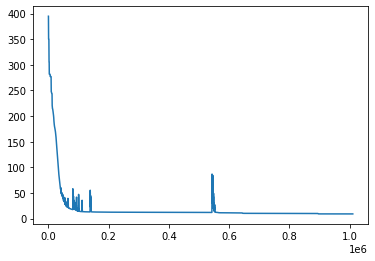

time = 271.75555100400015
96
> epoch=99, lrate=0.500, error=252.453
> epoch=199, lrate=0.500, error=220.881
> epoch=299, lrate=0.500, error=218.817
> epoch=399, lrate=0.500, error=216.712
> epoch=499, lrate=0.500, error=210.079
> epoch=599, lrate=0.500, error=205.338
> epoch=699, lrate=0.500, error=200.300
> epoch=799, lrate=0.500, error=200.292
> epoch=899, lrate=0.500, error=200.291
> epoch=999, lrate=0.500, error=200.290
> epoch=1099, lrate=0.500, error=200.290
> epoch=1199, lrate=0.500, error=200.289
> epoch=1299, lrate=0.500, error=200.288
> epoch=1399, lrate=0.500, error=200.286
> epoch=1499, lrate=0.500, error=197.639
> epoch=1599, lrate=0.500, error=197.638
> epoch=1699, lrate=0.500, error=197.637
> epoch=1799, lrate=0.500, error=197.637
> epoch=1899, lrate=0.500, error=197.637
> epoch=1999, lrate=0.500, error=197.637
> epoch=2099, lrate=0.500, error=197.637
> epoch=2199, lrate=0.500, error=197.637
> epoch=2299, lrate=0.500, error=197.637
> epoch=2399, lrate=0.500, error=197.63

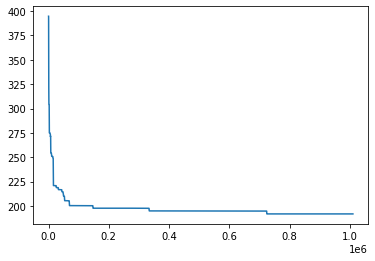

time = 399.58534021800006
1
> epoch=99, lrate=0.500, error=148.987
> epoch=199, lrate=0.500, error=138.170
> epoch=299, lrate=0.500, error=133.277
> epoch=399, lrate=0.500, error=130.479
> epoch=499, lrate=0.500, error=128.778
> epoch=599, lrate=0.500, error=127.673
> epoch=699, lrate=0.500, error=126.862
> epoch=799, lrate=0.500, error=126.093
> epoch=899, lrate=0.500, error=125.371
> epoch=999, lrate=0.500, error=124.905
> epoch=1099, lrate=0.500, error=124.102
> epoch=1199, lrate=0.500, error=123.816
> epoch=1299, lrate=0.500, error=123.472
> epoch=1399, lrate=0.500, error=122.915
> epoch=1499, lrate=0.500, error=122.841
> epoch=1599, lrate=0.500, error=124.785
> epoch=1699, lrate=0.500, error=123.017
> epoch=1799, lrate=0.500, error=123.143
> epoch=1899, lrate=0.500, error=123.110
> epoch=1999, lrate=0.500, error=121.936
> epoch=2099, lrate=0.500, error=122.414
> epoch=2199, lrate=0.500, error=121.617
> epoch=2299, lrate=0.500, error=124.488
> epoch=2399, lrate=0.500, error=122.347

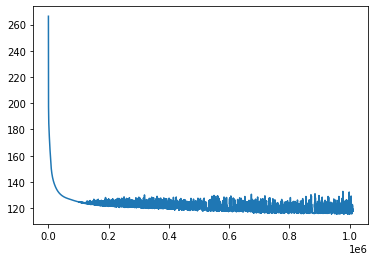

time = 85.21724663699933
48
> epoch=99, lrate=0.500, error=134.173
> epoch=199, lrate=0.500, error=98.362
> epoch=299, lrate=0.500, error=80.589
> epoch=399, lrate=0.500, error=71.340
> epoch=499, lrate=0.500, error=66.229
> epoch=599, lrate=0.500, error=62.128
> epoch=699, lrate=0.500, error=59.498
> epoch=799, lrate=0.500, error=57.010
> epoch=899, lrate=0.500, error=55.397
> epoch=999, lrate=0.500, error=55.831
> epoch=1099, lrate=0.500, error=53.567
> epoch=1199, lrate=0.500, error=54.013
> epoch=1299, lrate=0.500, error=52.298
> epoch=1399, lrate=0.500, error=50.915
> epoch=1499, lrate=0.500, error=48.899
> epoch=1599, lrate=0.500, error=49.259
> epoch=1699, lrate=0.500, error=49.972
> epoch=1799, lrate=0.500, error=47.386
> epoch=1899, lrate=0.500, error=50.336
> epoch=1999, lrate=0.500, error=47.453
> epoch=2099, lrate=0.500, error=51.094
> epoch=2199, lrate=0.500, error=45.935
> epoch=2299, lrate=0.500, error=48.369
> epoch=2399, lrate=0.500, error=48.140
> epoch=2499, lrate=0.

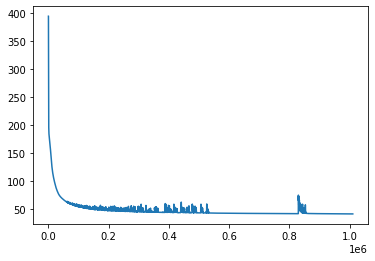

time = 144.51267048299997
79
> epoch=99, lrate=0.500, error=276.518
> epoch=199, lrate=0.500, error=224.617
> epoch=299, lrate=0.500, error=189.532
> epoch=399, lrate=0.500, error=113.502
> epoch=499, lrate=0.500, error=49.567
> epoch=599, lrate=0.500, error=26.983
> epoch=699, lrate=0.500, error=18.825
> epoch=799, lrate=0.500, error=12.105
> epoch=899, lrate=0.500, error=8.166
> epoch=999, lrate=0.500, error=7.063
> epoch=1099, lrate=0.500, error=6.197
> epoch=1199, lrate=0.500, error=5.122
> epoch=1299, lrate=0.500, error=4.895
> epoch=1399, lrate=0.500, error=4.774
> epoch=1499, lrate=0.500, error=4.657
> epoch=1599, lrate=0.500, error=4.579
> epoch=1699, lrate=0.500, error=4.519
> epoch=1799, lrate=0.500, error=4.470
> epoch=1899, lrate=0.500, error=4.430
> epoch=1999, lrate=0.500, error=4.396
> epoch=2099, lrate=0.500, error=4.367
> epoch=2199, lrate=0.500, error=4.341
> epoch=2299, lrate=0.500, error=4.319
> epoch=2399, lrate=0.500, error=4.300
> epoch=2499, lrate=0.500, error=4

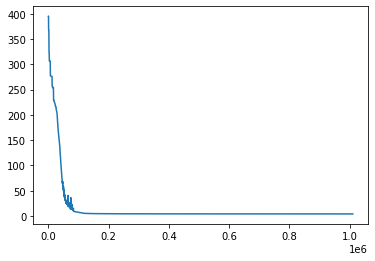

time = 317.48435188200165
98
> epoch=99, lrate=1.000, error=243.704
> epoch=199, lrate=1.000, error=154.862
> epoch=299, lrate=1.000, error=61.483
> epoch=399, lrate=1.000, error=44.880
> epoch=499, lrate=1.000, error=32.346
> epoch=599, lrate=1.000, error=25.704
> epoch=699, lrate=1.000, error=21.240
> epoch=799, lrate=1.000, error=45.843
> epoch=899, lrate=1.000, error=18.092
> epoch=999, lrate=1.000, error=17.880
> epoch=1099, lrate=1.000, error=17.559
> epoch=1199, lrate=1.000, error=17.436
> epoch=1299, lrate=1.000, error=16.443
> epoch=1399, lrate=1.000, error=16.345
> epoch=1499, lrate=1.000, error=16.296
> epoch=1599, lrate=1.000, error=16.262
> epoch=1699, lrate=1.000, error=16.235
> epoch=1799, lrate=1.000, error=16.214
> epoch=1899, lrate=1.000, error=16.197
> epoch=1999, lrate=1.000, error=16.183
> epoch=2099, lrate=1.000, error=16.170
> epoch=2199, lrate=1.000, error=16.160
> epoch=2299, lrate=1.000, error=16.150
> epoch=2399, lrate=1.000, error=16.142
> epoch=2499, lrate=

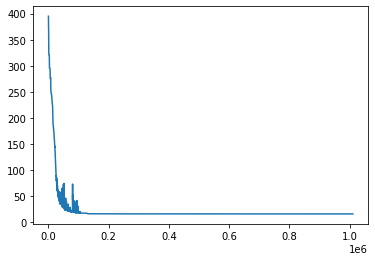

time = 315.98202849299923
92
> epoch=99, lrate=1.000, error=271.047
> epoch=199, lrate=1.000, error=193.453
> epoch=299, lrate=1.000, error=94.866
> epoch=399, lrate=1.000, error=38.596
> epoch=499, lrate=1.000, error=26.612
> epoch=599, lrate=1.000, error=32.774
> epoch=699, lrate=1.000, error=25.274
> epoch=799, lrate=1.000, error=22.377
> epoch=899, lrate=1.000, error=22.348
> epoch=999, lrate=1.000, error=22.566
> epoch=1099, lrate=1.000, error=21.419
> epoch=1199, lrate=1.000, error=22.088
> epoch=1299, lrate=1.000, error=21.297
> epoch=1399, lrate=1.000, error=20.884
> epoch=1499, lrate=1.000, error=21.167
> epoch=1599, lrate=1.000, error=21.175
> epoch=1699, lrate=1.000, error=21.206
> epoch=1799, lrate=1.000, error=21.066
> epoch=1899, lrate=1.000, error=20.829
> epoch=1999, lrate=1.000, error=21.286
> epoch=2099, lrate=1.000, error=20.891
> epoch=2199, lrate=1.000, error=20.767
> epoch=2299, lrate=1.000, error=20.395
> epoch=2399, lrate=1.000, error=20.485
> epoch=2499, lrate=

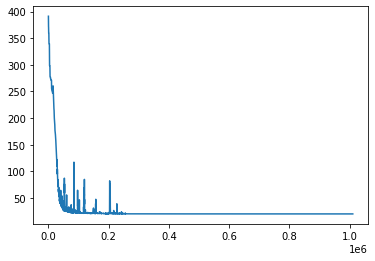

time = 341.47147298500204
86
> epoch=99, lrate=1.500, error=224.056
> epoch=199, lrate=1.500, error=107.676
> epoch=299, lrate=1.500, error=33.232
> epoch=399, lrate=1.500, error=28.137
> epoch=499, lrate=1.500, error=21.167
> epoch=599, lrate=1.500, error=18.963
> epoch=699, lrate=1.500, error=18.376
> epoch=799, lrate=1.500, error=18.585
> epoch=899, lrate=1.500, error=16.931
> epoch=999, lrate=1.500, error=20.536
> epoch=1099, lrate=1.500, error=20.956
> epoch=1199, lrate=1.500, error=16.212
> epoch=1299, lrate=1.500, error=15.668
> epoch=1399, lrate=1.500, error=14.923
> epoch=1499, lrate=1.500, error=19.607
> epoch=1599, lrate=1.500, error=15.510
> epoch=1699, lrate=1.500, error=16.224
> epoch=1799, lrate=1.500, error=15.576
> epoch=1899, lrate=1.500, error=16.448
> epoch=1999, lrate=1.500, error=14.806
> epoch=2099, lrate=1.500, error=14.415
> epoch=2199, lrate=1.500, error=18.093
> epoch=2299, lrate=1.500, error=21.605
> epoch=2399, lrate=1.500, error=16.445
> epoch=2499, lrate=

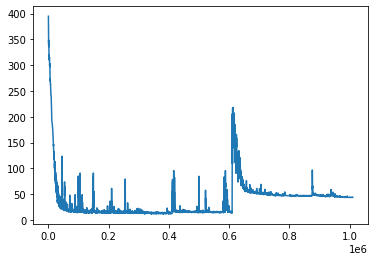

time = 318.4305124069979
77
> epoch=99, lrate=1.000, error=243.704
> epoch=199, lrate=1.000, error=154.862
> epoch=299, lrate=1.000, error=61.483
> epoch=399, lrate=1.000, error=44.880
> epoch=499, lrate=1.000, error=32.346
> epoch=599, lrate=1.000, error=25.704
> epoch=699, lrate=1.000, error=21.240
> epoch=799, lrate=1.000, error=45.843
> epoch=899, lrate=1.000, error=18.092
> epoch=999, lrate=1.000, error=17.880
> epoch=1099, lrate=1.000, error=17.559
> epoch=1199, lrate=1.000, error=17.436
> epoch=1299, lrate=1.000, error=16.443
> epoch=1399, lrate=1.000, error=16.345
> epoch=1499, lrate=1.000, error=16.296
> epoch=1599, lrate=1.000, error=16.262
> epoch=1699, lrate=1.000, error=16.235
> epoch=1799, lrate=1.000, error=16.214
> epoch=1899, lrate=1.000, error=16.197
> epoch=1999, lrate=1.000, error=16.183
> epoch=2099, lrate=1.000, error=16.170
> epoch=2199, lrate=1.000, error=16.160
> epoch=2299, lrate=1.000, error=16.150
> epoch=2399, lrate=1.000, error=16.142
> epoch=2499, lrate=1

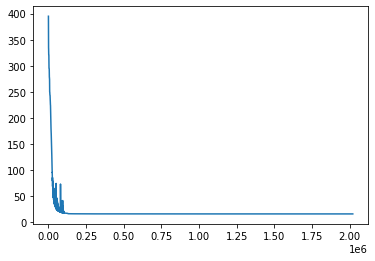

time = 635.132298155997
92
> epoch=99, lrate=1.000, error=229.966
> epoch=199, lrate=1.000, error=141.098
> epoch=299, lrate=1.000, error=57.427
> epoch=399, lrate=1.000, error=38.125
> epoch=499, lrate=1.000, error=29.895
> epoch=599, lrate=1.000, error=27.921
> epoch=699, lrate=1.000, error=24.551
> epoch=799, lrate=1.000, error=23.192
> epoch=899, lrate=1.000, error=22.808
> epoch=999, lrate=1.000, error=19.964
> epoch=1099, lrate=1.000, error=20.718
> epoch=1199, lrate=1.000, error=22.160
> epoch=1299, lrate=1.000, error=18.269
> epoch=1399, lrate=1.000, error=17.588
> epoch=1499, lrate=1.000, error=19.798
> epoch=1599, lrate=1.000, error=18.370
> epoch=1699, lrate=1.000, error=17.710
> epoch=1799, lrate=1.000, error=17.707
> epoch=1899, lrate=1.000, error=17.602
> epoch=1999, lrate=1.000, error=17.277
> epoch=2099, lrate=1.000, error=17.234
> epoch=2199, lrate=1.000, error=17.206
> epoch=2299, lrate=1.000, error=17.185
> epoch=2399, lrate=1.000, error=17.168
> epoch=2499, lrate=1.

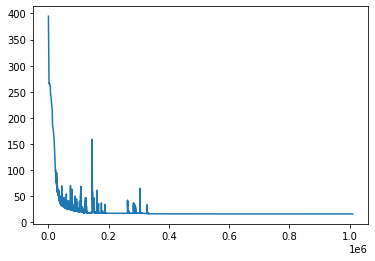

time = 291.1839364940024
92
> epoch=99, lrate=0.500, error=226.677
> epoch=199, lrate=0.500, error=206.605
> epoch=299, lrate=0.500, error=157.769
> epoch=399, lrate=0.500, error=82.729
> epoch=499, lrate=0.500, error=33.387
> epoch=599, lrate=0.500, error=21.524
> epoch=699, lrate=0.500, error=17.321
> epoch=799, lrate=0.500, error=13.638
> epoch=899, lrate=0.500, error=11.627
> epoch=999, lrate=0.500, error=11.097
> epoch=1099, lrate=0.500, error=10.846
> epoch=1199, lrate=0.500, error=10.691
> epoch=1299, lrate=0.500, error=10.585
> epoch=1399, lrate=0.500, error=10.507
> epoch=1499, lrate=0.500, error=10.448
> epoch=1599, lrate=0.500, error=10.401
> epoch=1699, lrate=0.500, error=10.362
> epoch=1799, lrate=0.500, error=10.330
> epoch=1899, lrate=0.500, error=10.303
> epoch=1999, lrate=0.500, error=10.280
> epoch=2099, lrate=0.500, error=10.259
> epoch=2199, lrate=0.500, error=10.241
> epoch=2299, lrate=0.500, error=10.223
> epoch=2399, lrate=0.500, error=10.204
> epoch=2499, lrate=

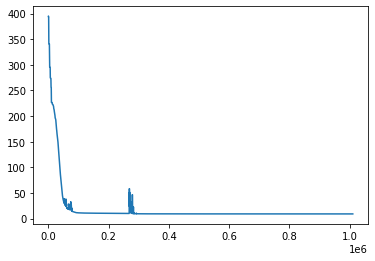

time = 295.1969149539982
96
> epoch=99, lrate=0.500, error=191.872
> epoch=199, lrate=0.500, error=191.800
> epoch=299, lrate=0.500, error=191.792
> epoch=399, lrate=0.500, error=191.789
> epoch=499, lrate=0.500, error=191.787
> epoch=599, lrate=0.500, error=191.786
> epoch=699, lrate=0.500, error=191.786
> epoch=799, lrate=0.500, error=191.785
> epoch=899, lrate=0.500, error=191.785
> epoch=999, lrate=0.500, error=191.784
> epoch=1099, lrate=0.500, error=191.784
> epoch=1199, lrate=0.500, error=191.784
> epoch=1299, lrate=0.500, error=191.784
> epoch=1399, lrate=0.500, error=191.783
> epoch=1499, lrate=0.500, error=191.783
> epoch=1599, lrate=0.500, error=191.783
> epoch=1699, lrate=0.500, error=191.783
> epoch=1799, lrate=0.500, error=191.783
> epoch=1899, lrate=0.500, error=191.783
> epoch=1999, lrate=0.500, error=191.783
> epoch=2099, lrate=0.500, error=191.783
> epoch=2199, lrate=0.500, error=191.783
> epoch=2299, lrate=0.500, error=191.783
> epoch=2399, lrate=0.500, error=191.783

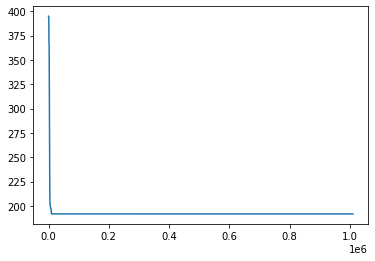

time = 319.20460994699897
1
> epoch=99, lrate=1.000, error=248.091
> epoch=199, lrate=1.000, error=145.005
> epoch=299, lrate=1.000, error=56.616
> epoch=399, lrate=1.000, error=30.369
> epoch=499, lrate=1.000, error=16.758
> epoch=599, lrate=1.000, error=15.133
> epoch=699, lrate=1.000, error=36.882
> epoch=799, lrate=1.000, error=8.720
> epoch=899, lrate=1.000, error=8.451
> epoch=999, lrate=1.000, error=52.027
> epoch=1099, lrate=1.000, error=7.381
> epoch=1199, lrate=1.000, error=7.280
> epoch=1299, lrate=1.000, error=7.229
> epoch=1399, lrate=1.000, error=7.196
> epoch=1499, lrate=1.000, error=7.172
> epoch=1599, lrate=1.000, error=7.151
> epoch=1699, lrate=1.000, error=6.207
> epoch=1799, lrate=1.000, error=6.159
> epoch=1899, lrate=1.000, error=6.138
> epoch=1999, lrate=1.000, error=6.124
> epoch=2099, lrate=1.000, error=6.113
> epoch=2199, lrate=1.000, error=6.104
> epoch=2299, lrate=1.000, error=6.096
> epoch=2399, lrate=1.000, error=6.090
> epoch=2499, lrate=1.000, error=6.08

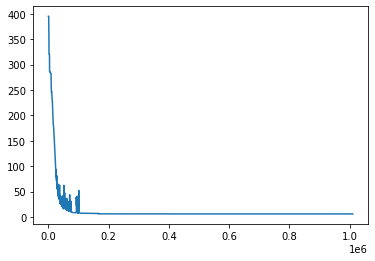

time = 327.3034486309989
98
> epoch=99, lrate=0.750, error=265.882
> epoch=199, lrate=0.750, error=194.756
> epoch=299, lrate=0.750, error=96.911
> epoch=399, lrate=0.750, error=32.401
> epoch=499, lrate=0.750, error=17.029
> epoch=599, lrate=0.750, error=14.021
> epoch=699, lrate=0.750, error=13.276
> epoch=799, lrate=0.750, error=12.911
> epoch=899, lrate=0.750, error=12.695
> epoch=999, lrate=0.750, error=12.563
> epoch=1099, lrate=0.750, error=12.473
> epoch=1199, lrate=0.750, error=12.407
> epoch=1299, lrate=0.750, error=12.356
> epoch=1399, lrate=0.750, error=12.316
> epoch=1499, lrate=0.750, error=12.283
> epoch=1599, lrate=0.750, error=12.256
> epoch=1699, lrate=0.750, error=12.232
> epoch=1799, lrate=0.750, error=12.210
> epoch=1899, lrate=0.750, error=12.183
> epoch=1999, lrate=0.750, error=11.401
> epoch=2099, lrate=0.750, error=10.686
> epoch=2199, lrate=0.750, error=32.078
> epoch=2299, lrate=0.750, error=10.294
> epoch=2399, lrate=0.750, error=10.266
> epoch=2499, lrate=0

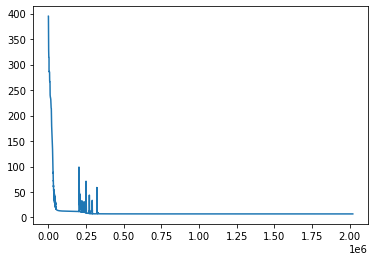

time = 629.4063487710009
97
> epoch=99, lrate=2.000, error=194.446
> epoch=199, lrate=2.000, error=78.631
> epoch=299, lrate=2.000, error=73.813
> epoch=399, lrate=2.000, error=34.510
> epoch=499, lrate=2.000, error=90.937
> epoch=599, lrate=2.000, error=30.987
> epoch=699, lrate=2.000, error=89.246
> epoch=799, lrate=2.000, error=26.810
> epoch=899, lrate=2.000, error=27.899
> epoch=999, lrate=2.000, error=24.090
> epoch=1099, lrate=2.000, error=25.588
> epoch=1199, lrate=2.000, error=22.363
> epoch=1299, lrate=2.000, error=116.030
> epoch=1399, lrate=2.000, error=29.515
> epoch=1499, lrate=2.000, error=21.225
> epoch=1599, lrate=2.000, error=20.737
> epoch=1699, lrate=2.000, error=20.293
> epoch=1799, lrate=2.000, error=21.973
> epoch=1899, lrate=2.000, error=20.122
> epoch=1999, lrate=2.000, error=21.119
> epoch=2099, lrate=2.000, error=21.004
> epoch=2199, lrate=2.000, error=20.112
> epoch=2299, lrate=2.000, error=20.953
> epoch=2399, lrate=2.000, error=21.611
> epoch=2499, lrate=2

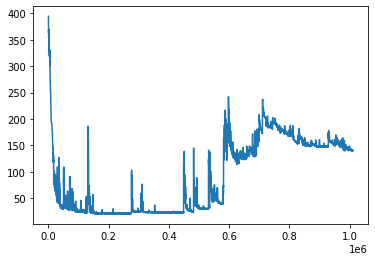

time = 315.8461112410005
35


In [136]:
c = 1
for i in layers_list:
    seed(1)
    network = initialize_network(i[0])
    n_inputs = len(dataset[0]) - 1
    n_outputs = len(dataset[0][-1])
    f=open('../Test_images/encryptor_design_summary.txt','a')
    s = "{})\n".format(c)
    f.write(s)
    s = "Test name : encryptor_{}_test\n".format(c)
    f.write(s)
    s = "Layers : " + str(i[0]) +"\n"
    f.write(s)
    f.close()
    start = timeit.default_timer()
    train_network(network, dataset, i[1], i[2], n_outputs, c)
    stop = timeit.default_timer()
    print("time = {}".format(stop - start))
    t = list()
    t.append(predict(network,dataset[0],0))
    count = 0
    for j in range(1,100):
        if predict(network,dataset[j],0) in t:
            count += 1
            index = j
        t.append(predict(network,dataset[j],0))
    f=open('../Test_images/encryptor_design_summary.txt','a')
    s = "Unique Predictions : {}\n".format(100-count)
    f.write(s)
    f.write("Time : {}".format(stop - start))
    f.close()
    print(100-count)
    if c % 3 == 0:
        time.sleep(60)
    c += 1
    

In [135]:
for i in range(10):
    print(i)
    if i%2 == 0:
        time.sleep(2)

0
1
2
3
4
5
6
7
8
9


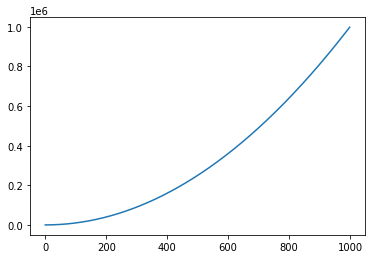

In [27]:
y = [x**2 for x in range(1000)]
x = [x for x in range(1000)]



<Figure size 432x288 with 0 Axes>

In [87]:
# Make a prediction with a network
def predict(network, row, encr):
    outputs = forward_propagate(network, row, encr)
    k = [round(i) for i in outputs]
    return k

In [88]:
k = list()
for i in range(100):
    k.append(predict(network, dataset[i], 0))
    k[i].append(dataset[i][:-1])

In [89]:
k

[[1, 1, 1, 0, 1, 0, 1, 1, [0, 0, 1, 1, 0, 0, 0, 0]],
 [1, 1, 1, 0, 0, 0, 0, 1, [0, 0, 1, 1, 0, 0, 0, 1]],
 [1, 0, 0, 0, 0, 0, 0, 0, [0, 0, 1, 1, 0, 0, 1, 0]],
 [1, 0, 0, 0, 0, 1, 1, 0, [0, 0, 1, 1, 0, 0, 1, 1]],
 [1, 1, 0, 0, 1, 1, 0, 1, [0, 0, 1, 1, 0, 1, 0, 0]],
 [0, 0, 0, 1, 1, 1, 0, 1, [0, 0, 1, 1, 0, 1, 0, 1]],
 [1, 0, 0, 0, 1, 1, 0, 1, [0, 0, 1, 1, 0, 1, 1, 0]],
 [1, 1, 1, 1, 1, 1, 0, 1, [0, 0, 1, 1, 0, 1, 1, 1]],
 [1, 1, 1, 0, 0, 1, 0, 1, [0, 0, 1, 1, 1, 0, 0, 0]],
 [1, 1, 0, 0, 1, 1, 0, 0, [0, 0, 1, 1, 1, 0, 0, 1]],
 [1, 0, 1, 0, 1, 1, 0, 0, [0, 1, 1, 0, 0, 0, 0, 1]],
 [1, 1, 1, 1, 1, 0, 1, 0, [0, 1, 1, 0, 0, 0, 1, 0]],
 [1, 0, 0, 1, 0, 0, 0, 1, [0, 1, 1, 0, 0, 0, 1, 1]],
 [1, 0, 1, 1, 0, 0, 1, 1, [0, 1, 1, 0, 0, 1, 0, 0]],
 [0, 0, 0, 1, 1, 0, 1, 0, [0, 1, 1, 0, 0, 1, 0, 1]],
 [1, 0, 1, 1, 0, 0, 1, 0, [0, 1, 1, 0, 0, 1, 1, 0]],
 [1, 0, 1, 0, 0, 1, 1, 1, [0, 1, 1, 0, 0, 1, 1, 1]],
 [1, 0, 1, 1, 0, 1, 0, 0, [0, 1, 1, 0, 1, 0, 0, 0]],
 [0, 0, 0, 0, 1, 1, 1, 1, [0, 1, 1, 0, 1, 0, 0

In [90]:

c = list()
for i in k:
    s = ""
    i = list(map(str,i))
    c.append(s.join(i))

In [91]:
len(list( dict.fromkeys(c)))

100

In [649]:
k

[[0, 0, 1, 1, 0, 0, 1, [0, 1, 1, 0, 0, 0, 0]],
 [0, 0, 0, 0, 0, 0, 0, [0, 1, 1, 0, 0, 0, 1]],
 [1, 1, 0, 0, 0, 0, 0, [0, 1, 1, 0, 0, 1, 0]],
 [1, 0, 1, 1, 1, 1, 0, [0, 1, 1, 0, 0, 1, 1]],
 [0, 0, 1, 0, 0, 1, 0, [0, 1, 1, 0, 1, 0, 0]],
 [0, 0, 1, 0, 1, 0, 1, [0, 1, 1, 0, 1, 0, 1]],
 [1, 0, 0, 0, 0, 0, 1, [0, 1, 1, 0, 1, 1, 0]],
 [1, 0, 0, 1, 1, 1, 1, [0, 1, 1, 0, 1, 1, 1]],
 [0, 1, 1, 1, 1, 0, 1, [0, 1, 1, 1, 0, 0, 0]],
 [1, 0, 1, 1, 1, 0, 0, [0, 1, 1, 1, 0, 0, 1]],
 [0, 1, 0, 0, 1, 0, 1, [1, 1, 0, 0, 0, 0, 1]],
 [0, 1, 0, 1, 1, 1, 0, [1, 1, 0, 0, 0, 1, 0]],
 [0, 1, 0, 1, 1, 1, 1, [1, 1, 0, 0, 0, 1, 1]],
 [1, 0, 1, 0, 1, 1, 0, [1, 1, 0, 0, 1, 0, 0]],
 [1, 1, 1, 0, 0, 0, 1, [1, 1, 0, 0, 1, 0, 1]],
 [1, 0, 0, 0, 1, 1, 0, [1, 1, 0, 0, 1, 1, 0]],
 [1, 0, 1, 1, 0, 0, 0, [1, 1, 0, 0, 1, 1, 1]],
 [0, 1, 0, 1, 1, 0, 1, [1, 1, 0, 1, 0, 0, 0]],
 [0, 1, 1, 1, 0, 1, 1, [1, 1, 0, 1, 0, 0, 1]],
 [0, 1, 1, 1, 0, 1, 1, [1, 1, 0, 1, 0, 1, 0]],
 [0, 1, 0, 1, 1, 0, 0, [1, 1, 0, 1, 0, 1, 1]],
 [1, 0, 1, 0,

99


In [93]:
t = np.random.randint(2, size= 8)
"".join(map(str, t))
p = "".join([str(a) for a in t])
if p in c:
    flag = 1
    while flag:
        t = np.random.randint(2, size= 8)
        "".join(map(str, t))
        p = "".join([str(a) for a in t])
        if p in c:
            flag = 1
        else:
            flag = 0

In [94]:
c = list()
for i in k:
    s = ""
    i = list(map(str,i))
    c.append(s.join(i))

In [95]:
len(list( dict.fromkeys(c)))

100

In [323]:
count = 0
dataset = list()
for i in ascii_list:
    p = list(i)
    p = list(map(int,p))
    j = list(k[count])
    j = list(map(int,j))
    count += 1
    p.append(j)
    dataset.append(p)

In [328]:
type(network)

list

In [331]:
import json
my_list = ['a', 'b', 'c']
my_json_string = json.dumps(my_list)

In [335]:
my_network_json = json.dumps(network)

In [26]:
# -*- coding: utf-8 -*-
import json

# Make it work for Python 2+3 and with Unicode
import io
try:
    to_unicode = unicode
except NameError:
    to_unicode = str

In [27]:
# Read JSON file
with open('../network/network.json') as data_file:
    new_network = json.load(data_file)

In [61]:
new_data =list()
for i in ascii_list:
    new_data.append(list(map(int,list(i))))

In [62]:
new_data

[[0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 1, 1],
 [0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 1, 0, 1],
 [0, 0, 1, 1, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 0, 1],
 [0, 1, 1, 0, 0, 0, 1, 0],
 [0, 1, 1, 0, 0, 0, 1, 1],
 [0, 1, 1, 0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0, 1, 0, 1],
 [0, 1, 1, 0, 0, 1, 1, 0],
 [0, 1, 1, 0, 0, 1, 1, 1],
 [0, 1, 1, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 0, 1],
 [0, 1, 1, 0, 1, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 1, 0, 0],
 [0, 1, 1, 0, 1, 1, 0, 1],
 [0, 1, 1, 0, 1, 1, 1, 0],
 [0, 1, 1, 0, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 0, 0, 1],
 [0, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 1, 1, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0],
 [0, 1, 1, 1, 0, 1, 0, 1],
 [0, 1, 1, 1, 0, 1, 1, 0],
 [0, 1, 1, 1, 0, 1, 1, 1],
 [0, 1, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 1, 0, 0, 1],
 [0, 1, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 0, 1],
 

In [30]:
for i in new_data:
    i.append(0)

In [31]:
en = list()
for i in range(len(new_data)):
    en.append(predict(new_network,new_data[i],0))

In [32]:
for i in range(len(new_data)):
    en[i].append(new_data[i][:-1])

In [33]:
# Write JSON file
with io.open('../datasets/languageDecryptor.json', 'w', encoding='utf8') as outfile:
    str_ = json.dumps(en,
                      indent=4, sort_keys=True,
                      separators=(',', ': '), ensure_ascii=False)
    outfile.write(to_unicode(str_))

In [36]:
data = list()
f=open("../asciiTextData/initialTestDocument.txt","r")
line=f.readline()
while line!='':
    data.append(line)
    print(line)
    line=f.readline()    

Hello good afternoon ladies and gentlemen.

This is the official testing document for encryptor & decryptor efficiency.

The following message is just a garbage and is only checked for efficiency

A

G

BhjUi

$342@/.dj

jSjjd


In [51]:
f=open('./test.txt','w')
a = [8,1,1,8]
f.write(str(a))
f.close()
 

In [37]:
bit_data = list()
for i in data:
    bit_data.append(text_to_bits(i))
flag = 1
for i in range(len(bit_data)):
    if ((len(bit_data[i]))%8) != 0:
        print("data corrupted")
        flag = 0
        break

if flag:
    print("data conversion preserved")

data conversion preserved


In [38]:
input_data = list()
for i in bit_data:
    l = len(i)
    k = int(l/8)
    c = 0
    for j in range(k):
        s = i[c:c+8]
        input_data.append(s)
        c += 8
        
c = 0
for i in bit_data:
    l = len(i)
    c += int(l/8)

if c == len(input_data):
    print("data input is ready")

input_data_final = list()
for i in input_data:
    a = list(i)
    b = list(i)
    a = list(map(int,a))
    b = list(map(int,b))
    a.append(b)
    input_data_final.append(a)

data input is ready


In [39]:
encrypted_data = list()
for i in input_data_final:
    encrypted_data.append(predict(new_network,i,0))

In [40]:
encrypted_data_final = list()
for i in encrypted_data:
    s = ""
    i = list(map(str,i))
    encrypted_data_final.append(s.join(i))

In [49]:
s = ""
for i in encrypted_data_final:
    s += i

In [50]:
s

'000000011001100111110101111101011101000111100111100111001101000111010001101101001110011110101010100000111110011010011001100101010001100011010001110100010001100011100111111101011010101010110100101000011001100100010110111001111010101000011000101101001110011110011100100110010001100011100110111101011001100111010101100110010001100000010011101101111011110111011100101000010001011011100111101000010001011011100111111001101101110010011001111001111101000110000011100000111010000110001101101000011010101011110101111001111110011010011001000101101110011010100001000110001001110011100111101101001101000110001101111111011101010110011001000110001110011011100111100000111101000110010101111001111001100100011000100011011001010110011000101111111110011011010001100101011110011111001011111001111011010010011001100011011001010110011000101111111110011011010001100101011110011110011001100000111000001110100001100011011010000110011001000110001000110110011000000100111011011110111101110111001001100111100111100000111101000

In [53]:
# encoding the text
code =  base64.b64encode(zlib.compress(s.encode('utf-8'),9))
code = code.decode('utf-8')
f=open('../asciiTextData/encrypted.txt','w')
f.write(code)
f.close()


In [55]:
print("Compressed text: \n"+code)


Compressed text: 
eNqtVIENwzAIe8n8/9yqFYOdhKrS1qnJlhFjMAB8nwi+14PQ/Vrvc1m/xnmee560HT8AYcskX9TdHa/PySr5FG6C3R4aE/nXwqPwNp75Ve6LX7Rf5gf2m/YAUetSLsQPYOB3PC//zi9UpfIdskusDBaSt9bX/ZzzZ7yjg1T+vGxaUrEpX5JfRgVJSNWH6eQ8Mj7DR7mW/B3xomw9DgjWL/iC806fOb539bXUx5rPqa/RffWo80HHZOZdiYnPVP/oCRGH+lvnyda37Rell82fkc/zXJj6cptPXh8S11EfOQd0Hm5z6VU//Ku+OkjIfI22lWikt6H6uf/GQ/dNRawNJoNoqXPBFz40okC+3/c+XlZMGg==


In [56]:
file = open('../asciiTextData/encrypted.txt','r')
text = file.read()
file.close()

In [57]:
text

'eNqtVIENwzAIe8n8/9yqFYOdhKrS1qnJlhFjMAB8nwi+14PQ/Vrvc1m/xnmee560HT8AYcskX9TdHa/PySr5FG6C3R4aE/nXwqPwNp75Ve6LX7Rf5gf2m/YAUetSLsQPYOB3PC//zi9UpfIdskusDBaSt9bX/ZzzZ7yjg1T+vGxaUrEpX5JfRgVJSNWH6eQ8Mj7DR7mW/B3xomw9DgjWL/iC806fOb539bXUx5rPqa/RffWo80HHZOZdiYnPVP/oCRGH+lvnyda37Rell82fkc/zXJj6cptPXh8S11EfOQd0Hm5z6VU//Ku+OkjIfI22lWikt6H6uf/GQ/dNRawNJoNoqXPBFz40okC+3/c+XlZMGg=='

In [58]:
decoded_txt = zlib.decompress(base64.b64decode(text))

In [59]:
output = decoded_txt.decode()

In [60]:
output

'000000011001100111110101111101011101000111100111100111001101000111010001101101001110011110101010100000111110011010011001100101010001100011010001110100010001100011100111111101011010101010110100101000011001100100010110111001111010101000011000101101001110011110011100100110010001100011100110111101011001100111010101100110010001100000010011101101111011110111011100101000010001011011100111101000010001011011100111111001101101110010011001111001111101000110000011100000111010000110001101101000011010101011110101111001111110011010011001000101101110011010100001000110001001110011100111101101001101000110001101111111011101010110011001000110001110011011100111100000111101000110010101111001111001100100011000100011011001010110011000101111111110011011010001100101011110011111001011111001111011010010011001100011011001010110011000101111111110011011010001100101011110011110011001100000111000001110100001100011011010000110011001000110001000110110011000000100111011011110111101110111001001100111100111100000111101000

In [86]:
from datetime import datetime


In [93]:
now = datetime.now()
d1 = now.strftime("%Y_%m_%d_%H%M%S")+".txt"
d1

'2020_03_22_183036.txt'

In [77]:
type(d1)

str

In [43]:
text_to_bits("|adf23-")


'01111100011000010110010001100110001100100011001100101101'

In [30]:
from docx import Document

ModuleNotFoundError: No module named 'docx'